In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('startup_data_new.csv')

In [5]:
df.shape

(50, 2)

In [57]:
df.head(15)

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94
5,362861.36,156991.12
6,127716.82,156122.51
7,323876.68,155752.60
8,311613.29,152211.77
9,304981.62,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Profit           50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [7]:
df.describe()

,Marketing Spend,Profit
count,50.000000,50.000000
mean,211025.097800,112012.639200
std,122290.310726,40306.180338
min,0.000000,14681.400000
25%,129300.132500,90138.902500
50%,212716.240000,107978.190000
75%,299469.085000,139765.977500
max,471784.100000,192261.830000


In [8]:
x = df['Marketing Spend']
y = df['Profit']
m = len(x)

In [9]:
#Hypothesis function
def hypo(x,a0,a1):
    hypo = a0 + a1*x   #y=mx+c
    return hypo

#Cost Function(J)   J = 1/2*m((hypo(x[i],a0,a1)-y[i])**2)
def J(a0,a1,x,y,m):
    j = 0
    
    for i in range(m):
        j += (hypo(x[i],a0,a1) - y[i])**2

    return j/(2*m)

#Gradient Descent function
def gradient(a0,a1,x,y,m):
    Dja0 = 0
    Dja1 = 1
    
    for i in range(m):
        Dja0 += (hypo(x[i],a0,a1) - y[i])
        Dja1 += (hypo(x[i],a0,a1) - y[i])*x[i]
        
    grad = [Dja0/m,Dja1/m]
    return grad 

#update function to update theta values i.e. a0,a1
def update(a0,a1,gradient,alpha):
    
    a0p0 = a0 - alpha*gradient[0]
    a1p1 = a1 - alpha*gradient[1]
    
    update = [a0p0,a1p1]
    return update
    



0.6288339347615681 0.2328124388080557


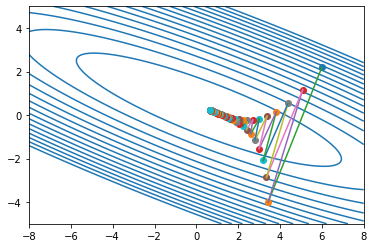

In [10]:
#plotting subplots
fig,ax = plt.subplots()
p0 = np.linspace(-8,8,490)
p1 = np.linspace(-5,5,490)

pa0, pa1 = np.meshgrid(p0,p1)

j = J(pa0,pa1,x/100000,y/100000,m=len(x))
ax.contour(pa0,pa1,J(pa0,pa1,x/100000,y/100000,m=len(x)),colors='C0',levels=[i for i in np.arange(0,80,5)])


a0 = 6
a1 = 2.2
ax.plot(a0,a1,'o')

for i in range(250):
    a0old = a0
    a1old = a1
    #updating the values
    a0,a1 = update(a0,a1,gradient(a0,a1,x/100000,y/100000,m=len(x)),alpha=0.27)
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1],'-')
    
print(a0,a1)


In [11]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

#mean normalization
x_new = (x - x_mean)/x_std
y_new = (y - y_mean)/y_std

In [12]:
def plot_s(start=[-1,4],alpha=0.5,steps=10):
    fig,ax = plt.subplots()
    p0 = np.linspace(-5,5,100)
    p1 = np.linspace(-2,5,100)

    pa0, pa1 = np.meshgrid(p0,p1)

    #j = J(pa0,pa1,x/100000,y/100000,m=len(x))
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)),colors='C0',levels=[i for i in np.arange(0,80,0.9)])


    a0 = start[0]
    a1 = start[1]
    ax.plot(a0,a1,'o')

    for i in range(steps):
        a0old = a0
        a1old = a1
        #updating the values
        a0,a1 = update(a0,a1,gradient(a0,a1,x_new,y_new,m=len(x)),alpha=alpha)
        print(a0,a1)
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1],'-')


-0.49999999999999944 2.396405203653323
-0.24999999999999956 1.5785718575165184
-0.12499999999999974 1.161476850986748
-0.062499999999999896 0.9487583976565649
-0.031249999999999993 0.8402719864581716
-0.015625000000000083 0.784943916746991
-0.007812500000000167 0.756726601194289
-0.003906250000000218 0.7423357702624109
-0.001953125000000229 0.7349964464871531
-0.000976562500000251 0.7312533913617716


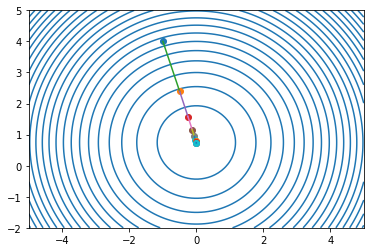

In [13]:
plot_s(start=[-1,4],alpha=0.5,steps=10)

In [14]:
a0,a1

(0.6288339347615681, 0.2328124388080557)

In [21]:
def plot_graph(x,y,a0,a1):
    fig,ax = plt.subplots()
    ax.plot(x,y,'o',label="training data")
    ax.plot(x,hypo(x_new,a0,a1),label="h(x) = %.2f + %.2f * x"%(a0,a1))
    plt.legend()

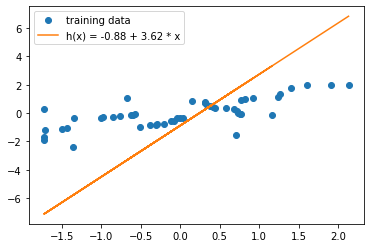

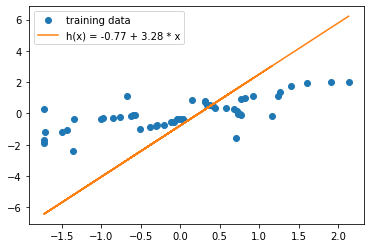

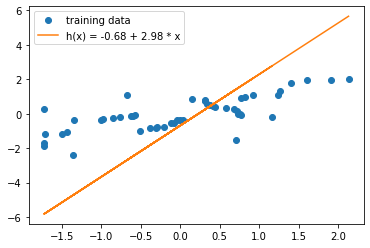

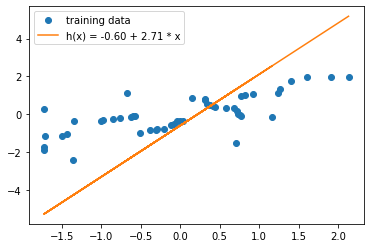

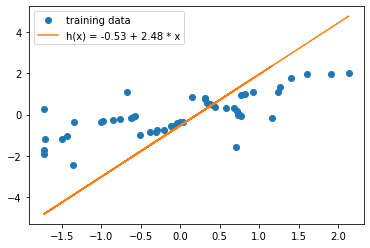

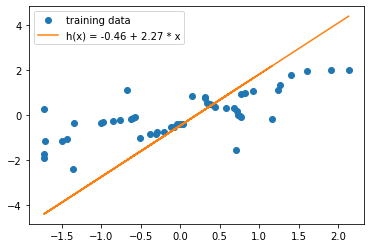

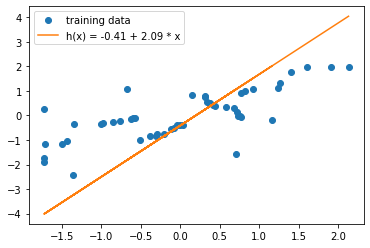

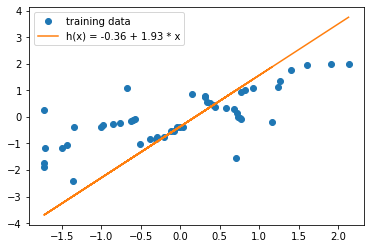

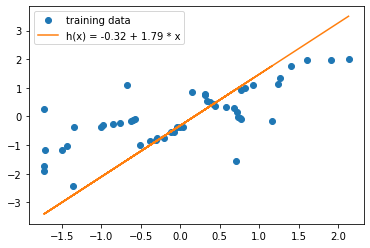

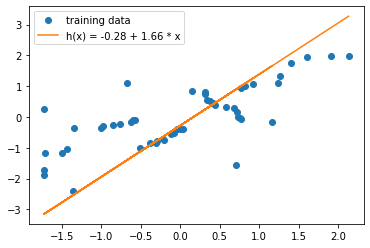

In [109]:
a0 = -1
a1 = 4
for i in range(10):
    gJ = gradient(a0,a1,x_new,y_new,m)
    a0,a1 = update(a0,a1,gJ,alpha=0.12)
    plot_graph(x_new,y_new,a0,a1)

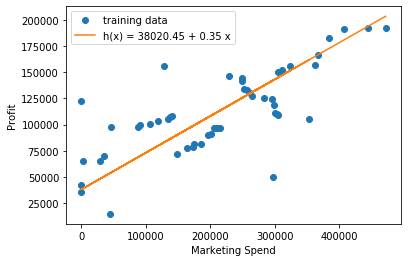

In [50]:
a0 = 0
a1 = 0.94

b1 = y_std/(x_std*a1)
b0 = y_std*a0 - b1*x_mean + y_mean

fig,ax = plt.subplots()

ax.plot(x,y,'o',label="training data")
ax.plot(x,b0+b1*x,label="h(x) = %.2f + %.2f x"%(b0,b1))
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Profit')
plt.legend()

In [51]:
def predict(x,a0,a1):
    pre = y_std*(a0 + a1*(x - x_mean)/x_std) + y_mean
    return pre

In [55]:
predict(471784,0,0.94)

192800.5900840739

In [80]:
predict(362861,0,0.88)


156051.56749400182

In [108]:
predict(383199,0,1.25)

182947.0442881902

In [69]:
predict(311613,0,1.2)

151796.46935100772

In [68]:
predict(256512,0,1.5)

134500.96970049804